# Employee Attrition Prediction

###### Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

- Education: 1) 'Below College', 2) 'College', 3) 'Bachelor', 4) 'Master', 5) 'Doctor'
- EnvironmentSatisfaction: 1) 'Low', 2) 'Medium', 3) 'High', 4) 'Very High'
- JobInvolvement: 1) 'Low' 2) 'Medium' 3) 'High' 4) 'Very High'
- JobSatisfaction: 1) 'Low' 2) 'Medium' 3) 'High' 4) 'Very High'
- PerformanceRating: 1) 'Low' 2) 'Good' 3) 'Excellent' 4) 'Outstanding'
- RelationshipSatisfaction: 1) 'Low' 2) 'Medium' 3) 'High' 4) 'Very High'
- WorkLifeBalance: 1) 'Bad' 2) 'Good' 3) 'Better' 4) 'Best'

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV,cross_val_predict, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import classification_report, roc_auc_score
    
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.options.display.max_columns = None
pd.options.display.float_format = "{:,.2f}".format

In [2]:
Emp = pd.read_csv('C:/Users/anoos/Documents/IBM Employee Attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv')
Emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# information and shape of the dataset
print("Information about the dataset")
print("=============================")
print(Emp.info(),'\n')

#Shape of the dataset
print("Shape of the dataset:",Emp.shape)
print("====================\n")


Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null

In [4]:
#Find for nulls 
print("Find for nulls")
print("==============")
print(Emp.isnull().sum(),'\n')

# Checking the percentage of missing values
round(100*(Emp.isnull().sum()/len(Emp.index)), 2)


Find for nulls
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole       

Age                        0.00
Attrition                  0.00
BusinessTravel             0.00
DailyRate                  0.00
Department                 0.00
DistanceFromHome           0.00
Education                  0.00
EducationField             0.00
EmployeeCount              0.00
EmployeeNumber             0.00
EnvironmentSatisfaction    0.00
Gender                     0.00
HourlyRate                 0.00
JobInvolvement             0.00
JobLevel                   0.00
JobRole                    0.00
JobSatisfaction            0.00
MaritalStatus              0.00
MonthlyIncome              0.00
MonthlyRate                0.00
NumCompaniesWorked         0.00
Over18                     0.00
OverTime                   0.00
PercentSalaryHike          0.00
PerformanceRating          0.00
RelationshipSatisfaction   0.00
StandardHours              0.00
StockOptionLevel           0.00
TotalWorkingYears          0.00
TrainingTimesLastYear      0.00
WorkLifeBalance            0.00
YearsAtC

In [5]:
#describe the dataset
print("Describe the dataset")
print("====================")
Emp.describe()

Describe the dataset


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,2.73,"6,502.93","14,313.10",2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,"4,707.96","7,117.79",2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,"2,911.00","8,047.00",1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,3.00,"4,919.00","14,235.50",2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,4.00,"8,379.00","20,461.50",4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


### Observations
- No null values
- Dataset size (1470 x 35)

In [6]:
print('Numeric Columns:',list(Emp.select_dtypes(['int64']).columns),'\n')
print('String Columns:',list(Emp.select_dtypes(['object']).columns))

Numeric Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

String Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [7]:
# Attrition Rate distribution
dist = Emp['Attrition'].value_counts()
print(dist)
No_attr = dist[0]/Emp['Attrition'].count()*100
Attr = dist[1]/Emp['Attrition'].count()*100

print('Current employees count & %:',dist[0], '==>',format(No_attr,'.2f'),'%')
print('Ex-employees count & %:',dist[1], '==>',format(Attr,'.2f'),'%')

No     1233
Yes     237
Name: Attrition, dtype: int64
Current employees count & %: 1233 ==> 83.88 %
Ex-employees count & %: 237 ==> 16.12 %


In [8]:
#Find unique values and the respective count for columns with data type - object
print('Unique values in the column "Attrition":',Emp['Attrition'].unique(),
    '\nValue Count in the column "Attrition":\n',Emp['Attrition'].value_counts(),'\n')

Unique values in the column "Attrition": ['Yes' 'No'] 
Value Count in the column "Attrition":
 No     1233
Yes     237
Name: Attrition, dtype: int64 



In [9]:
for i in list(Emp.select_dtypes(include=['object']).columns):
    print('Value Count in the column "',i,'":\n',Emp[i].value_counts(),'\n')

Value Count in the column " Attrition ":
 No     1233
Yes     237
Name: Attrition, dtype: int64 

Value Count in the column " BusinessTravel ":
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

Value Count in the column " Department ":
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

Value Count in the column " EducationField ":
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

Value Count in the column " Gender ":
 Male      882
Female    588
Name: Gender, dtype: int64 

Value Count in the column " JobRole ":
 Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Repres

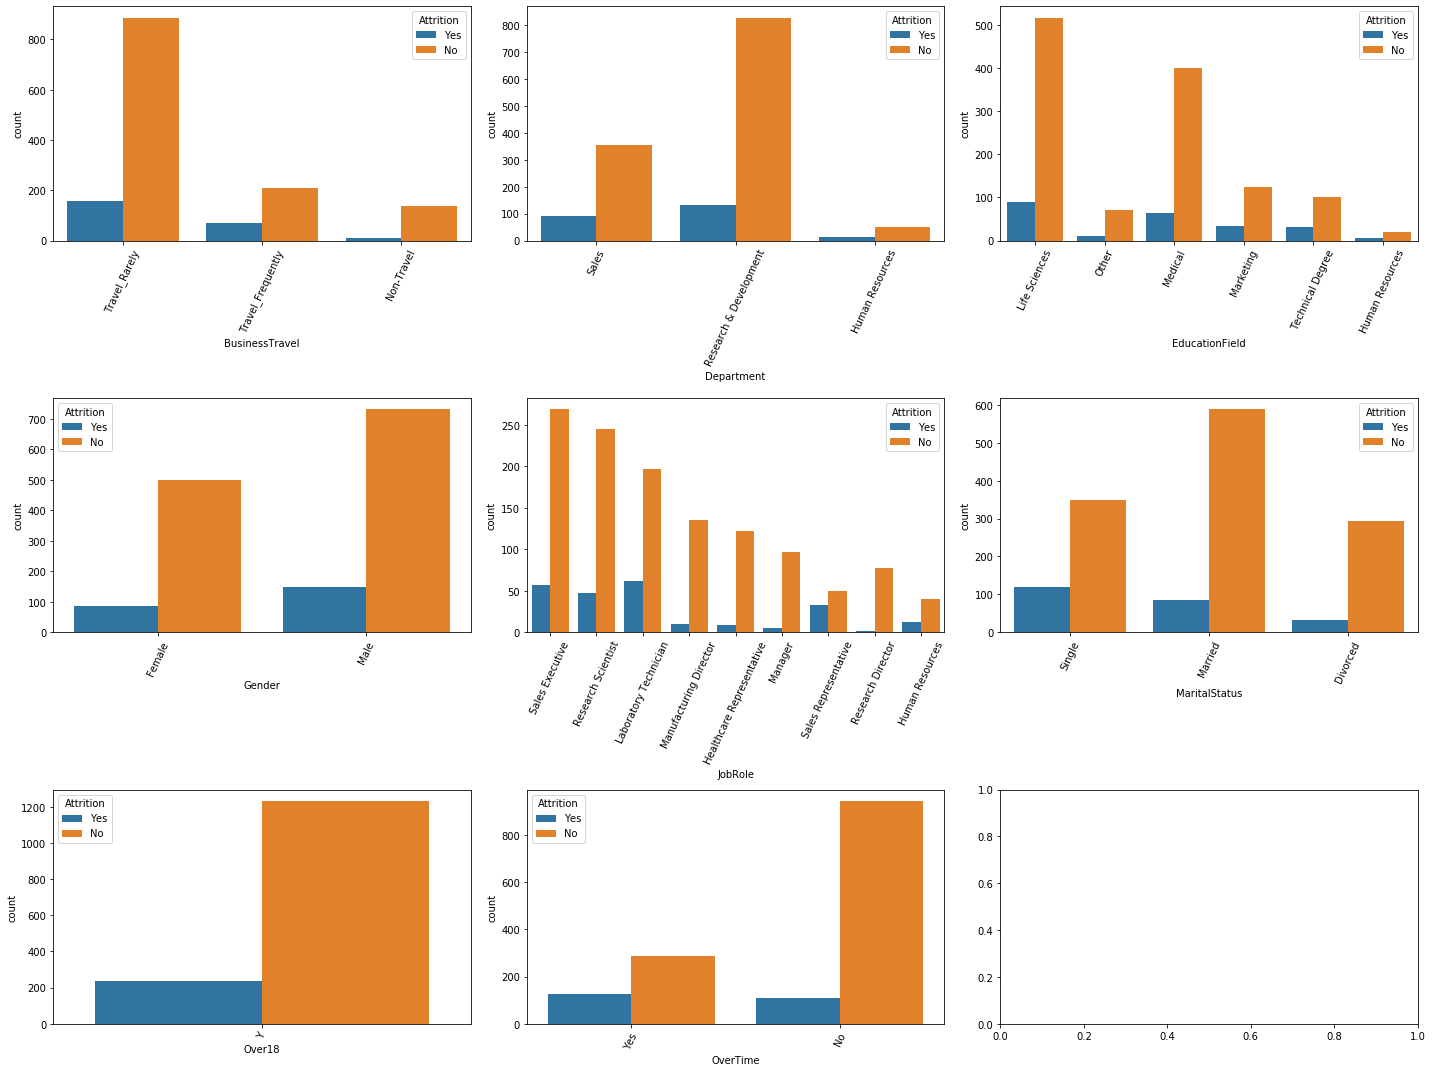

In [10]:
#Plotting countplots
fig,axes = plt.subplots(3,3,figsize=(20,15))

col_lst = list(Emp.select_dtypes(['object']).columns)
col_lst.remove('Attrition')

y=0
for col in list(col_lst):
    i,j = divmod(y,3)
#     print(i,j)
    g = sns.countplot(x=col,hue='Attrition',data = Emp,ax=axes[i ,j])
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    g.set_xticklabels(g.get_xticklabels(),rotation=65)
    y=y+1
    
# fig.autofmt_xdate()

plt.tight_layout()
plt.show()  

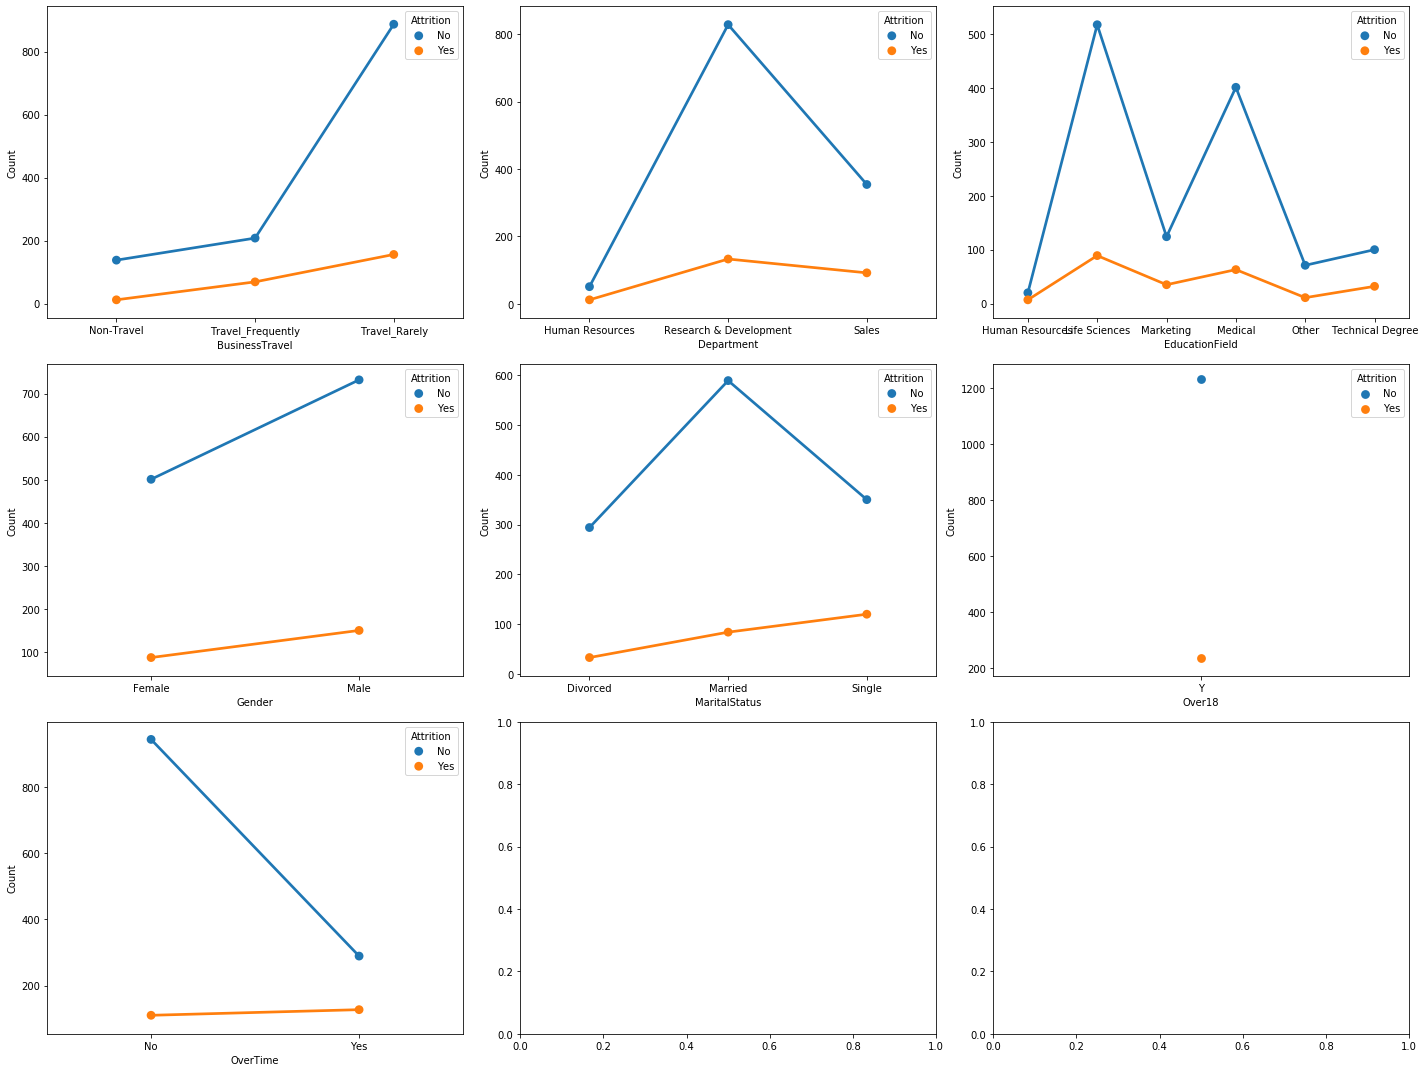

In [11]:
col_lst = list(Emp.select_dtypes(['object']).columns)
col_lst.remove('Attrition')
col_lst.remove('JobRole')
fig,axes = plt.subplots(3,3,figsize=(20,15))
var=0
# print(col_lst,'***')

for idx in range(len(col_lst)):
    
    cols = list(['Attrition',col_lst[idx]])
    i,j = divmod(var,3)
    tmpdf = pd.DataFrame(Emp.groupby(cols).size())
    tmpdf =tmpdf.rename(columns={0:'Count'})
    tmpdf.reset_index(inplace=True)
#     plt.xticks(rotation=65)
    sns.catplot(x=col_lst[idx], y='Count', hue="Attrition", kind="point", data=tmpdf,ax=axes[i ,j])
#     g = sns.catplot(x=col_lst[idx], y='Count', hue="Attrition", kind="point", data=tmpdf,ax=axes[i ,j])
#     plt.sca(axes[i,j])
    plt.xticks(rotation=90)
#     plt.tight_layout() 
#     print(col_lst[idx])
#     g.fig.suptitle(col_lst[idx])
#     plt.xticks(rotation='vertical')
#     for ax in g.axes.ravel():
#         ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    var=var+1
    plt.close(plt.gcf())
    
# plt.xticks(rotation=45)    
plt.tight_layout()    
    

plt.show()  

Index(['Attrition', 'JobRole', 'Count'], dtype='object')


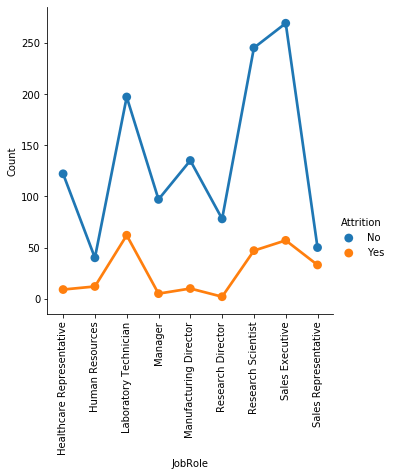

In [15]:

cols = list(['Attrition','JobRole'])
tmpdf = pd.DataFrame(Emp.groupby(cols).size())
tmpdf =tmpdf.rename(columns={0:'Count'})
tmpdf.reset_index(inplace=True)
print(tmpdf.columns)
sns.catplot(x='JobRole', y='Count', hue="Attrition", kind="point", data=tmpdf)
plt.xticks(rotation=90)  
plt.show()

In [16]:
# Display the attrition rate based on the attribute
col_lst = list(Emp.select_dtypes(['object']).columns)
col_lst.remove('Attrition')

for idx in range(len(col_lst)):
    cols = list(['Attrition',col_lst[idx]])
    tmpdf = pd.DataFrame(Emp.groupby(cols).size())
    tmpdf = tmpdf.rename(columns={0:'Count'})
    tmpdf.reset_index(inplace=True)
    newdf = tmpdf.pivot(index = col_lst[idx],columns='Attrition',values='Count')
    newdf['Attrition_Rate(%)'] = newdf['Yes']/(newdf['No']+newdf['Yes'])*100
    newdf.reset_index(inplace=True)
    newdf.rename(index={'Attrition':'S.No.'},inplace=True)
    cols = list([col_lst[idx],'Attrition_Rate(%)'])
    display(newdf[cols].sort_values(['Attrition_Rate(%)'],ascending=False))

Attrition,BusinessTravel,Attrition_Rate(%)
1,Travel_Frequently,24.91
2,Travel_Rarely,14.96
0,Non-Travel,8.00


Attrition,Department,Attrition_Rate(%)
2,Sales,20.63
0,Human Resources,19.05
1,Research & Development,13.84


Attrition,EducationField,Attrition_Rate(%)
0,Human Resources,25.93
5,Technical Degree,24.24
2,Marketing,22.01
1,Life Sciences,14.69
3,Medical,13.58
4,Other,13.41


Attrition,Gender,Attrition_Rate(%)
1,Male,17.01
0,Female,14.80


Attrition,JobRole,Attrition_Rate(%)
8,Sales Representative,39.76
2,Laboratory Technician,23.94
1,Human Resources,23.08
7,Sales Executive,17.48
6,Research Scientist,16.10
4,Manufacturing Director,6.90
0,Healthcare Representative,6.87
3,Manager,4.90
5,Research Director,2.50


Attrition,MaritalStatus,Attrition_Rate(%)
2,Single,25.53
1,Married,12.48
0,Divorced,10.09


Attrition,Over18,Attrition_Rate(%)
0,Y,16.12


Attrition,OverTime,Attrition_Rate(%)
1,Yes,30.53
0,No,10.44


In [17]:
#Find unique values and the respective count for columns with data type - int64
for i in list(Emp.select_dtypes(include=['int64']).columns):
    print('Value Count in the column "',i,'":\n',Emp[i].value_counts(),'\n')


Value Count in the column " Age ":
 35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64 

Value Count in the column " DailyRate ":
 691     6
1082    5
329     5
1329    5
530     5
408     5
715     4
589     4
906     4
350     4
827     4
1146    4
1283    4
829     4
688     4
1125    4
430     4
465     4
575     4
147     4
217     4
933     4
117     4
427     4
1490    4
977     4
921     4
1157    4
1469    4
950     4
       ..
862     1
854     1
931     1
848     1
845     1
841     1
840     1
835     1
830     1
828     1
880     1
881     1
883     1
887     1
929     1
926     1
924     1
918     1
917     1
916     1

#####  <font color = 'green'> Categorical columns with data type = int64 are Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance.

#####  <font color = 'green'> The columns EmployeeCount, StandardHours, Over18 can be dropped as it has only one value.

#####  <font color = 'green'> The column EmployeeNumber could be used as index for the DataFrame

In [18]:
Num_cols = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [19]:
# Checking for outliers in the continuous variables
Emp[Num_cols].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,65.89,"6,502.93","14,313.10",2.69,15.21,11.28,2.80,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,20.33,"4,707.96","7,117.79",2.50,3.66,7.78,1.29,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,30.00,"1,009.00","2,094.00",0.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,48.00,"2,911.00","8,047.00",1.00,12.00,6.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,66.00,"4,919.00","14,235.50",2.00,14.00,10.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,83.75,"8,379.00","20,461.50",4.00,18.00,15.00,3.00,9.00,7.00,3.00,7.00
90%,50.00,"1,356.00",23.00,94.00,"13,775.60","24,001.70",7.00,21.00,23.00,5.00,15.00,9.00,7.00,9.00
95%,54.00,"1,424.10",26.00,97.00,"17,821.35","25,431.90",8.00,22.00,28.00,5.00,20.00,11.00,9.00,10.00
99%,58.31,"1,485.00",29.00,100.00,"19,626.31","26,704.24",9.00,25.00,35.00,6.00,31.00,15.00,14.00,14.00


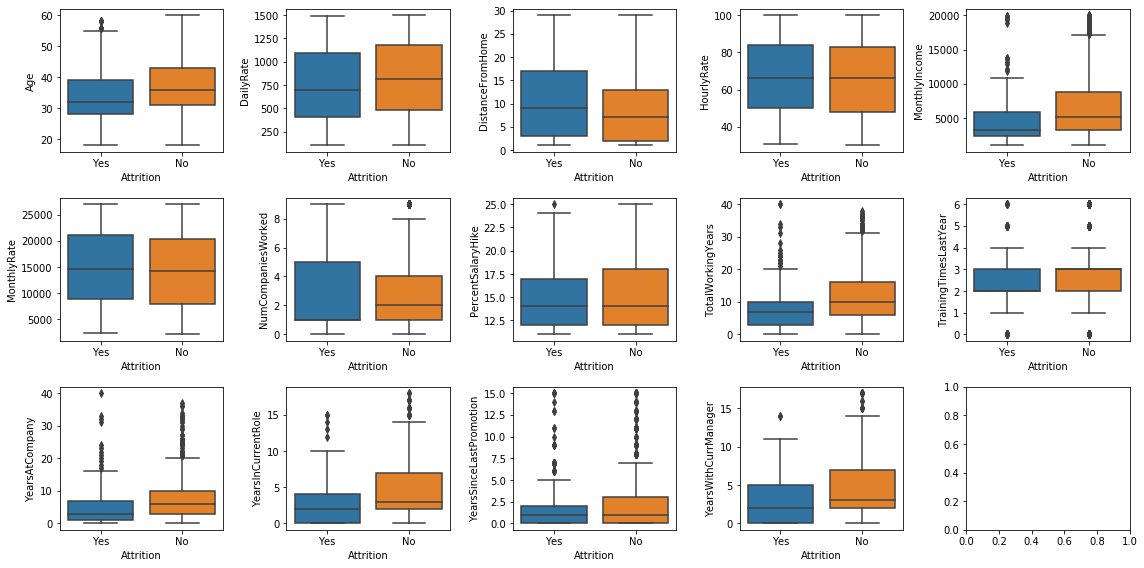

In [20]:
#Plotting boxplots to see the outliers
fig,axes = plt.subplots(3,5,figsize=(16,8))

y=0
for col in list(Emp[Num_cols].columns):
    i,j = divmod(y,5)
#     print(i,j)
    sns.boxplot(y=col,x='Attrition',data = Emp,orient = 'v',ax=axes[i ,j])
    y=y+1
    
    
plt.tight_layout()
plt.show()    
  

#####  <font color = 'green'>  Outliers are seen incase of TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, no capping would be done as the values look to be valid.

###  <font color = 'blue'>  Converting some binary variables to 0/1
The columns 'Attrition', 'OverTime', and 'Gender' have two unique values. We can replace them by 0s and 1s
Yes':1, 'No':0 ; 'Male':1,'Female':0

In [21]:
print(Emp['Attrition'].unique(),Emp['OverTime'].unique(),Emp['Gender'].unique())


['Yes' 'No'] ['Yes' 'No'] ['Female' 'Male']


In [22]:
# List of variables to map
var_lst = ['Attrition','OverTime']

# Defining the map function
def bin_map(x):
    return x.map({'Yes':1, 'No':0})

# Apply the function
Emp[var_lst] = Emp[var_lst].apply(bin_map)
Emp['Gender'] = Emp['Gender'].map({'Male':1,'Female':0})
print(Emp['Attrition'].unique(),Emp['OverTime'].unique(),Emp['Gender'].unique())

[1 0] [1 0] [0 1]


### One-hot encoding: For categorical variables with multiple levels, create dummy features 

In [23]:
Dummy = pd.get_dummies(Emp[['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']],drop_first=True)
Emp = pd.concat([Emp,Dummy],axis=1)
Emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [24]:
# Set Employee Number as index
Emp.set_index('EmployeeNumber',inplace=True)
Emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [25]:
# Comparing the encoded values
Emp.groupby(['MaritalStatus','MaritalStatus_Married','MaritalStatus_Single']).size().reset_index().rename(columns={0:'count'})

,MaritalStatus,MaritalStatus_Married,MaritalStatus_Single,count
0,Divorced,0,0,327
1,Married,1,0,673
2,Single,0,1,470


In [26]:
def encd_count(dat,fldnam):
    dat1=dat.groupby([col for col in Emp if col.startswith(fldnam)])
    return(pd.DataFrame(dat1.size().reset_index().rename(columns={0:'count'})))

In [27]:
display(encd_count(Emp,'BusinessTravel'))
display(encd_count(Emp,'Department'))
display(encd_count(Emp,'EducationField'))
display(encd_count(Emp,'JobRole'))

,BusinessTravel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,count
0,Non-Travel,0,0,150
1,Travel_Frequently,1,0,277
2,Travel_Rarely,0,1,1043


,Department,Department_Research & Development,Department_Sales,count
0,Human Resources,0,0,63
1,Research & Development,1,0,961
2,Sales,0,1,446


,EducationField,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,count
0,Human Resources,0,0,0,0,0,27
1,Life Sciences,1,0,0,0,0,606
2,Marketing,0,1,0,0,0,159
3,Medical,0,0,1,0,0,464
4,Other,0,0,0,1,0,82
5,Technical Degree,0,0,0,0,1,132


,JobRole,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,count
0,Healthcare Representative,0,0,0,0,0,0,0,0,131
1,Human Resources,1,0,0,0,0,0,0,0,52
2,Laboratory Technician,0,1,0,0,0,0,0,0,259
3,Manager,0,0,1,0,0,0,0,0,102
4,Manufacturing Director,0,0,0,1,0,0,0,0,145
5,Research Director,0,0,0,0,1,0,0,0,80
6,Research Scientist,0,0,0,0,0,1,0,0,292
7,Sales Executive,0,0,0,0,0,0,1,0,326
8,Sales Representative,0,0,0,0,0,0,0,1,83


In [28]:
# Dropping redundant columns
Emp.drop(['EmployeeCount' , 'Over18', 'StandardHours','BusinessTravel','Department','EducationField','JobRole','MaritalStatus'],axis=1,inplace=True)
Emp.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
5,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [29]:
# PAirplot -- to be uncommented later
# plt.figure(figsize=(20,40))
# Emp_pair = Emp[Num_cols]
# Emp_pair['Attrition'] = Emp['Attrition']
# sns.pairplot(Emp_pair,hue = 'Attrition',height=1.75)

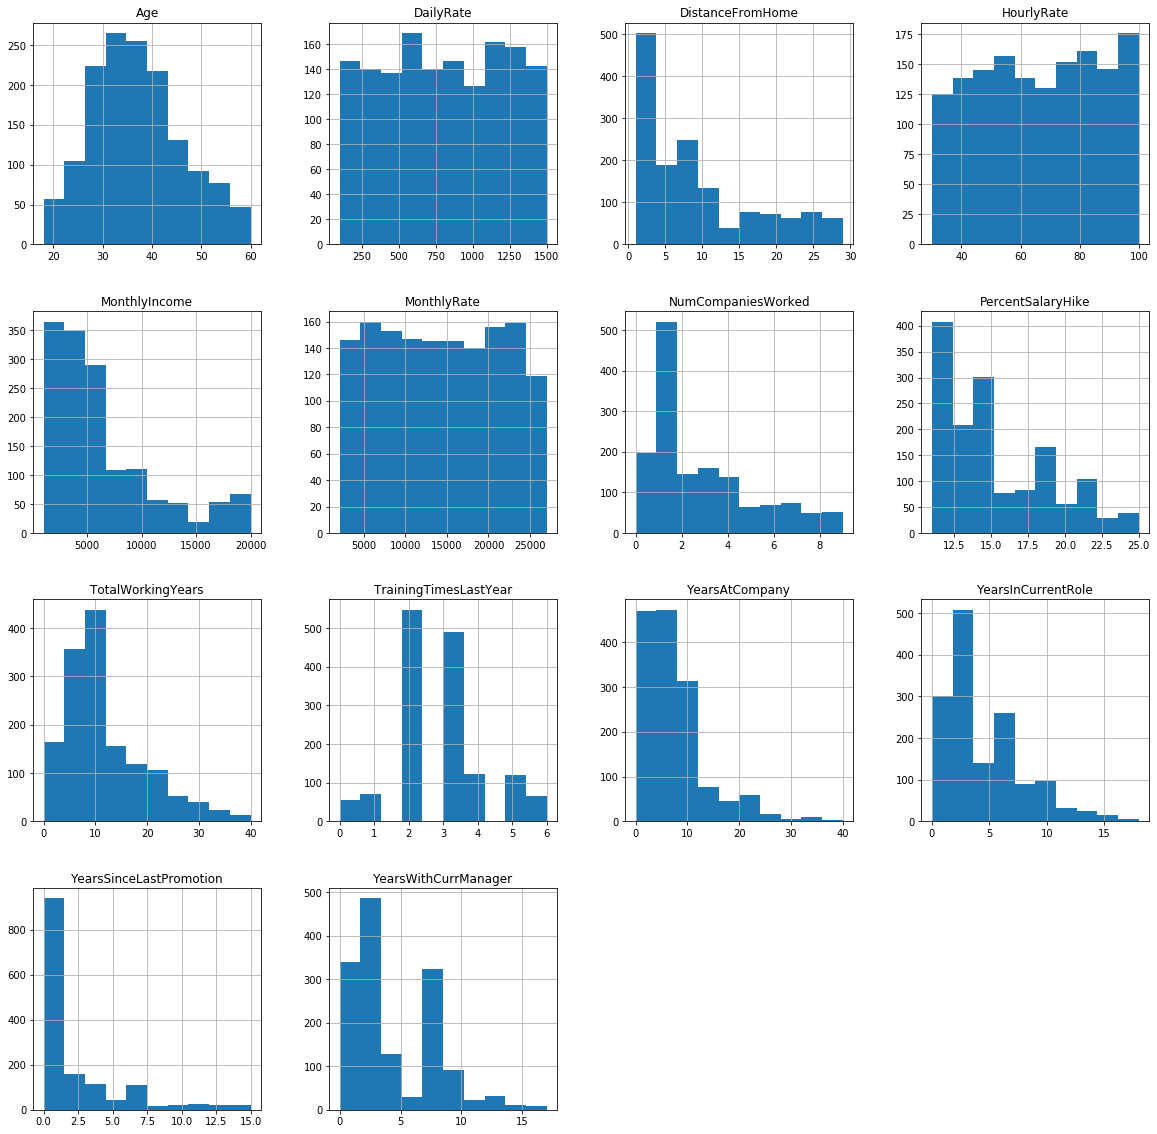

In [30]:
# Plotting Histogram for the attributes
Emp[Num_cols].hist(bins=10,figsize=(20,20))
plt.show()

# Observations 

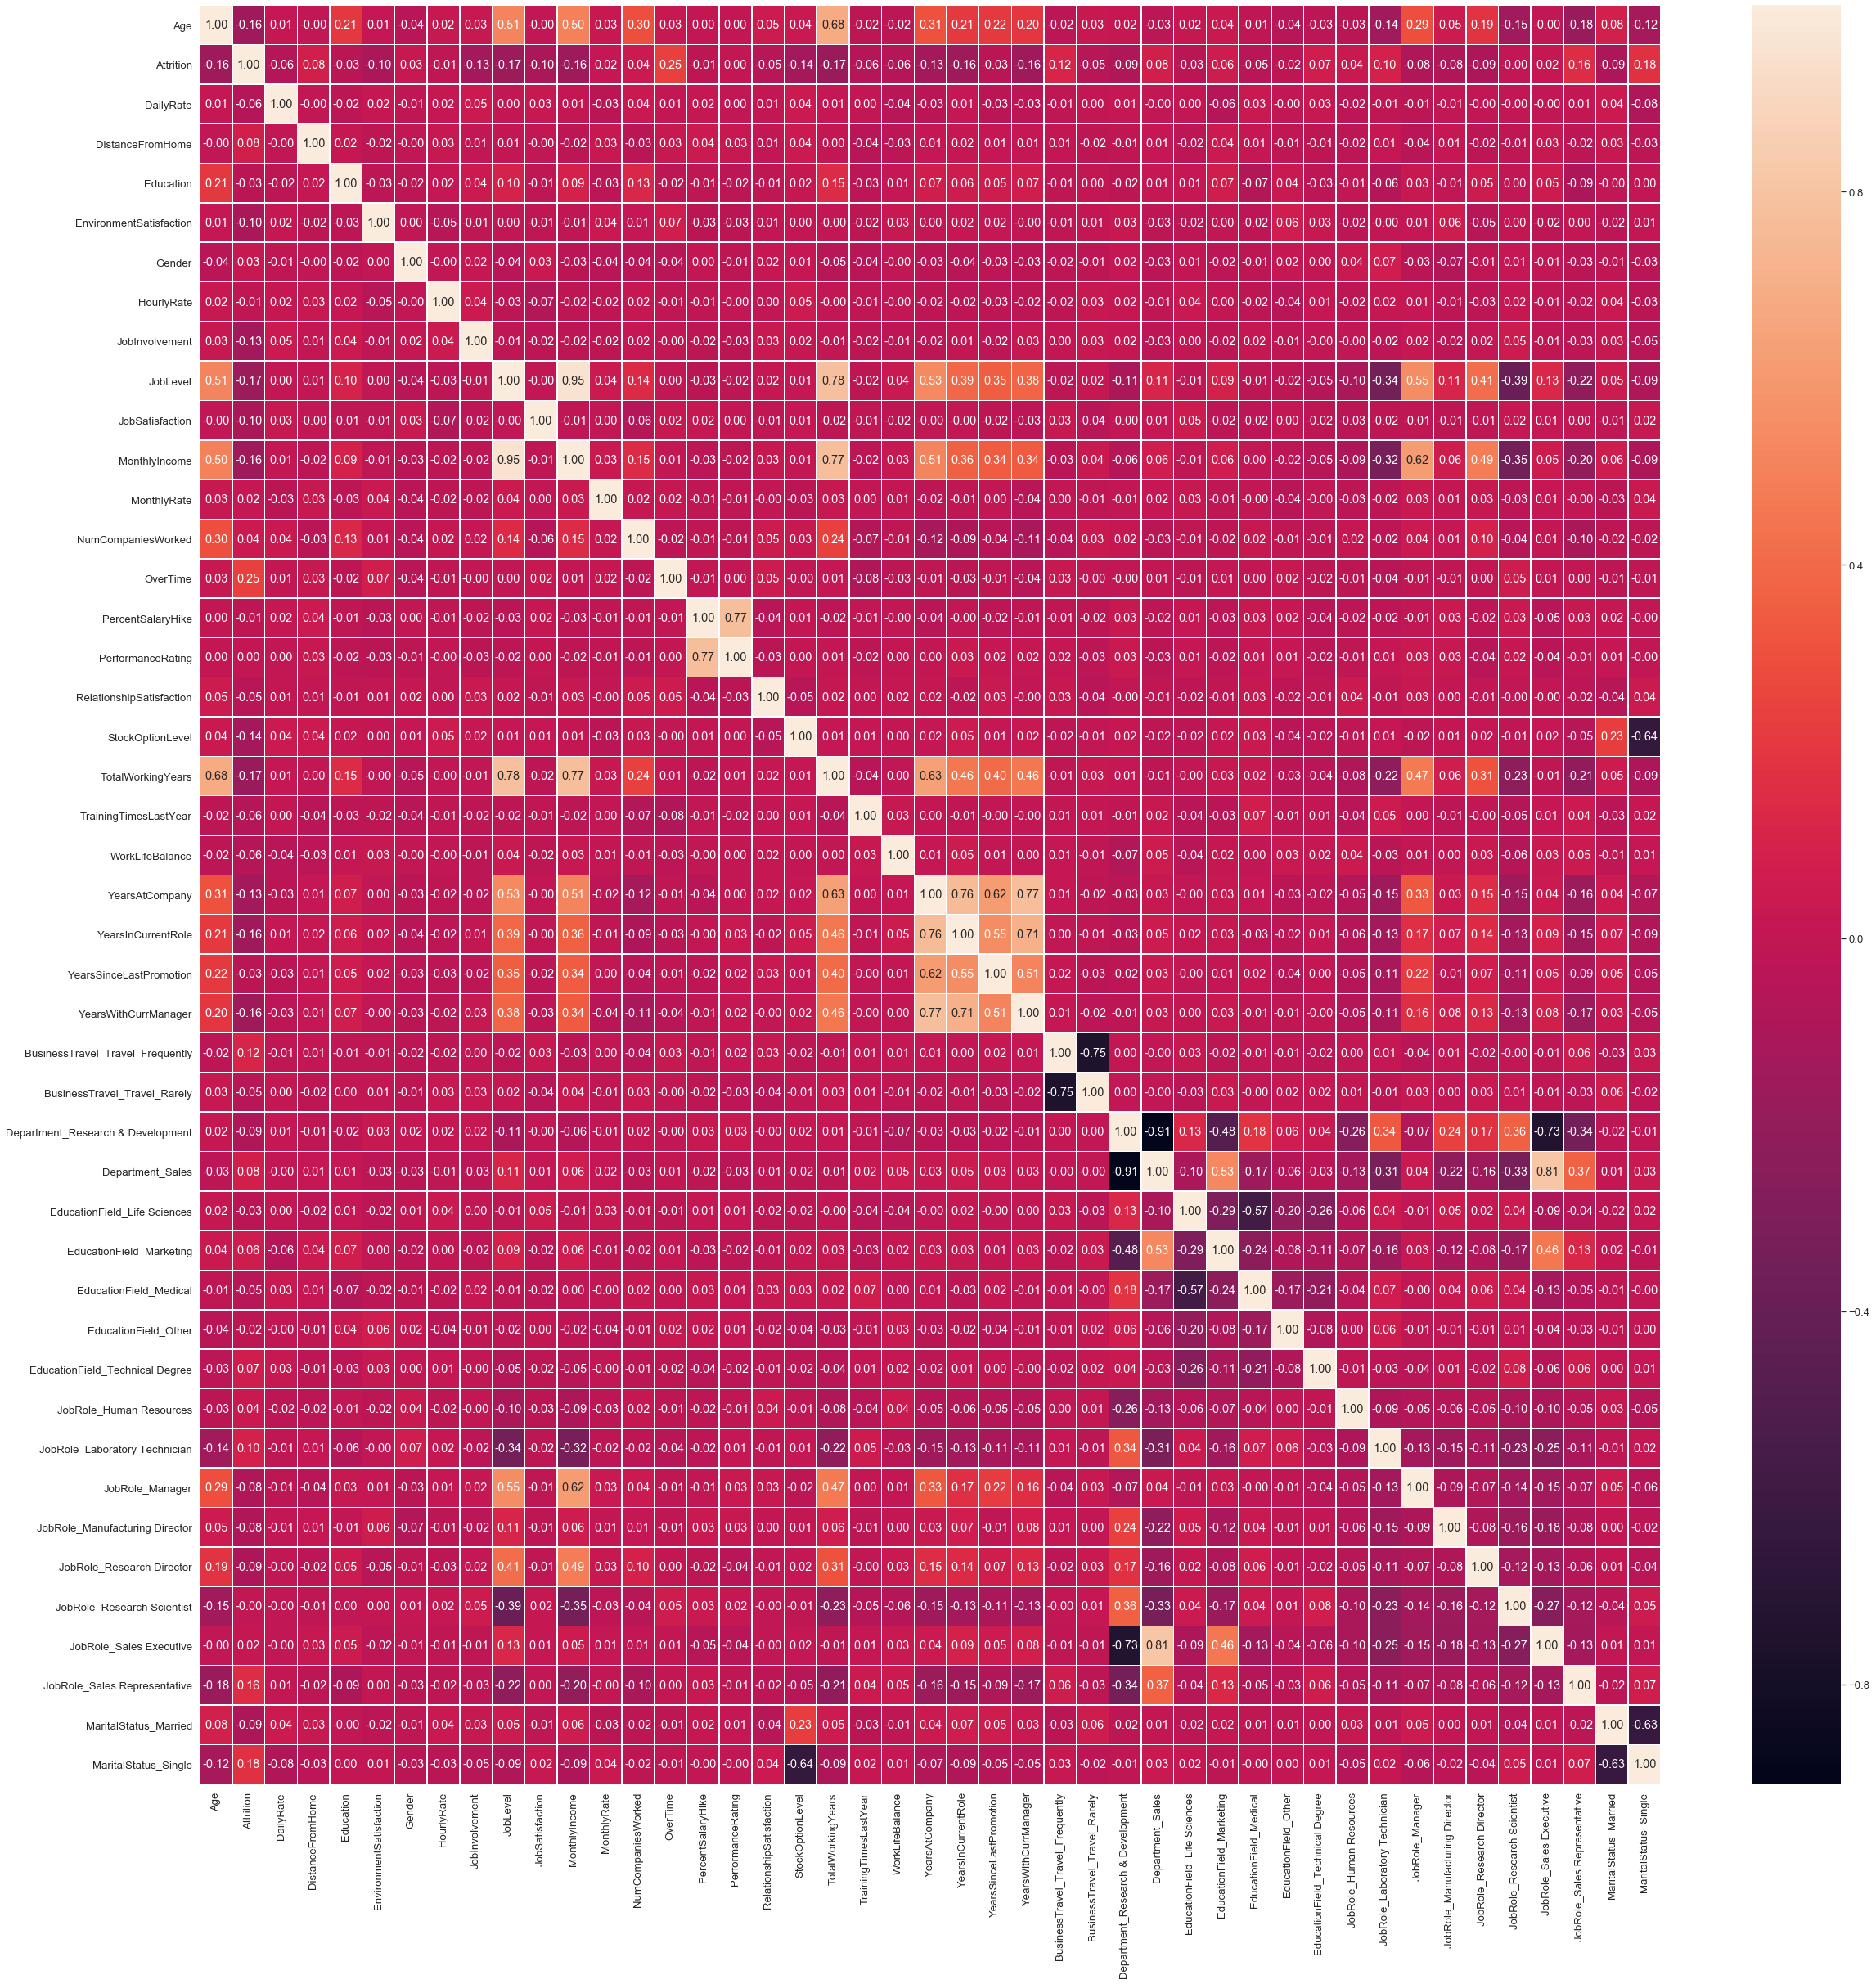

In [31]:
# to be uncommented later

plt.figure(figsize=(40,40))
sns.set(font_scale=1.2)
# f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(Emp.corr(),annot=True,linewidths = .5, fmt='.2f')

# Topmost positively & negatively correlated features


In [32]:
# Top attributes positively and negatively correlated with the column 'Attrition'
tmp = Emp.corr()
Attr_corr = tmp['Attrition'].sort_values()
print(Attr_corr.head(5),'\n')
print(Attr_corr.tail(6))

TotalWorkingYears    -0.17
JobLevel             -0.17
YearsInCurrentRole   -0.16
MonthlyIncome        -0.16
Age                  -0.16
Name: Attrition, dtype: float64 

JobRole_Laboratory Technician      0.10
BusinessTravel_Travel_Frequently   0.12
JobRole_Sales Representative       0.16
MaritalStatus_Single               0.18
OverTime                           0.25
Attrition                          1.00
Name: Attrition, dtype: float64


In [33]:
s = tmp.unstack()
so = s.sort_values(kind="quicksort")
# type(so)

In [34]:
print(so[so!=1.00].head(10),'\n')
print(so[so!=1.00].tail(10))

Department_Sales                   Department_Research & Development   -0.91
Department_Research & Development  Department_Sales                    -0.91
BusinessTravel_Travel_Rarely       BusinessTravel_Travel_Frequently    -0.75
BusinessTravel_Travel_Frequently   BusinessTravel_Travel_Rarely        -0.75
Department_Research & Development  JobRole_Sales Executive             -0.73
JobRole_Sales Executive            Department_Research & Development   -0.73
MaritalStatus_Single               StockOptionLevel                    -0.64
StockOptionLevel                   MaritalStatus_Single                -0.64
MaritalStatus_Single               MaritalStatus_Married               -0.63
MaritalStatus_Married              MaritalStatus_Single                -0.63
dtype: float64 

TotalWorkingYears        MonthlyIncome             0.77
MonthlyIncome            TotalWorkingYears         0.77
PercentSalaryHike        PerformanceRating         0.77
PerformanceRating        PercentSalaryHike   

In [35]:
# Drop highly correlated features (~0.9)
Emp.drop(['Department_Research & Development','JobLevel'],axis=1,inplace=True)
Emp.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,2,2,0,94,3,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,49,0,279,8,1,3,1,61,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,37,1,1373,2,2,4,1,92,2,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
5,33,0,1392,3,4,4,0,56,3,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,27,0,591,2,1,1,1,40,3,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [36]:
# Lets cap the outliers and check

In [673]:
def drop_outliers(dat,col_lst):
    for col in col_lst:
#         print(col)
        Q1 = dat[col].quantile(0.25)
        Q3 = dat[col].quantile(0.75)
        IQR = Q3-Q1
#         print(Q1,Q3,IQR)
        dat = dat[(dat[col] >= Q1-1.5*IQR) & (dat[col] <= Q3+1.5*IQR)]
    return dat

In [674]:
col_lst = ['YearsSinceLastPromotion','YearsAtCompany','TotalWorkingYears']
Emp_ot = drop_outliers(Emp,col_lst)

In [675]:
print(Emp.shape)
print(Emp_ot.shape)

(1470, 43)
(1240, 43)


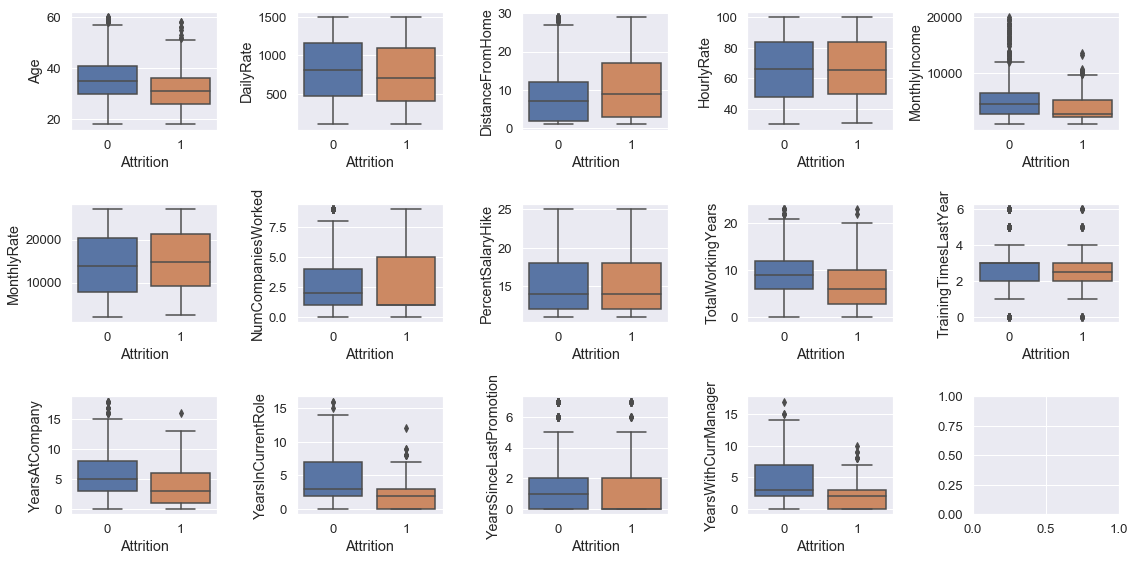

In [676]:
Emp = Emp_ot
#Plotting boxplots to see the outliers
fig,axes = plt.subplots(3,5,figsize=(16,8))

y=0
for col in list(Emp_ot[Num_cols].columns):
    i,j = divmod(y,5)
#     print(i,j)
    sns.boxplot(y=col,x='Attrition',data = Emp,orient = 'v',ax=axes[i ,j])
    y=y+1
    
    
plt.tight_layout()
plt.show() 

# Train Test split

In [677]:
X = Emp.drop(['Attrition'],axis=1)
# print(X.head(2))
# print(X.shape)

y = Emp['Attrition']
# print(y.head(2))
# print(y.shape)

In [678]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=50)
print('X_train:',X_train.shape,'y_train:',y_train.shape,'X_test:',X_test.shape,'y_test:',y_test.shape)

X_train: (868, 42) y_train: (868,) X_test: (372, 42) y_test: (372,)


In [679]:
print("***********Training Data**************")
print("Shape of training dataset: ", X_train.shape, ", Current Employees: ", np.size(X_train,0) - sum(y_train), ", Ex-Employees: " ,sum(y_train))
print("% of Ex-employees in the training dataset: ", format(sum(y_train)*100/np.size(X_train,0),'.2f'),'%')
print("\n")
print("***********Test Data**************")
print("Shape of test dataset: ", X_test.shape, ", Current Employees: ", np.size(X_test,0) - sum(y_test), ", Ex-Employees: " ,sum(y_test))
print("% of Ex-employees in the test dataset: ", format(sum(y_test)*100/np.size(X_test,0),'.2f'),'%')

***********Training Data**************
Shape of training dataset:  (868, 42) , Current Employees:  715 , Ex-Employees:  153
% of Ex-employees in the training dataset:  17.63 %


***********Test Data**************
Shape of test dataset:  (372, 42) , Current Employees:  309 , Ex-Employees:  63
% of Ex-employees in the test dataset:  16.94 %


#####  <font color = 'green'> In both training and test datasets, 16% of data pertains to ex-employees. 


# Scaling the numeric cols


In [680]:
pd.set_option('display.max_columns', None)
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
498,28,304,9,4,2,1,92,3,4,5253,20750,1,0,16,3,4,0,7,1,3,7,5,0,7,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
707,25,810,8,3,4,1,57,4,2,4851,15678,0,0,22,4,3,1,4,4,3,3,2,1,2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1918,26,1096,6,3,3,1,61,4,4,2544,7102,0,0,18,3,1,1,8,3,3,7,7,7,7,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
793,29,657,27,3,2,0,66,3,3,4335,25549,4,0,12,3,1,1,11,3,2,8,7,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1821,46,261,21,2,4,0,66,3,2,8926,10842,4,0,22,4,4,1,13,2,4,9,7,3,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [681]:
scaler = StandardScaler()

cols_norm = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
X_train[cols_norm]=scaler.fit_transform(X_train[cols_norm])
X_train.head()

C:\Users\anoos\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\anoos\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
498,-0.84,-1.25,-0.04,1.09,-0.68,1,1.30,0.37,1.14,0.01,0.91,-0.66,0,0.20,-0.43,1.21,-0.92,-0.36,-1.39,0.33,0.43,0.45,-0.73,1.11,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
707,-1.19,0.02,-0.16,0.11,1.15,1,-0.46,1.75,-0.65,-0.11,0.19,-1.06,0,1.88,2.34,0.27,0.25,-0.96,0.93,0.33,-0.66,-0.54,-0.22,-0.48,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1918,-1.08,0.74,-0.41,0.11,0.23,1,-0.26,1.75,1.14,-0.81,-1.03,-1.06,0,0.76,-0.43,-1.59,0.25,-0.16,0.16,0.33,0.43,1.11,2.85,1.11,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
793,-0.72,-0.36,2.18,0.11,-0.68,0,-0.01,0.37,0.24,-0.26,1.60,0.54,0,-0.92,-0.43,-1.59,0.25,0.44,0.16,-1.08,0.70,1.11,-0.22,-0.80,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1821,1.28,-1.36,1.44,-0.88,1.15,0,-0.01,0.37,-0.65,1.13,-0.50,0.54,0,1.88,2.34,1.21,0.25,0.84,-0.62,1.75,0.97,1.11,0.80,1.11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [682]:
X_test[cols_norm]=scaler.fit_transform(X_test[cols_norm])
X_test.head()

C:\Users\anoos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\anoos\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
204,-0.06,-0.33,-1.03,2.00,0.32,1,1.32,0.36,-0.66,0.61,-0.37,-0.67,0,-0.60,-0.42,-1.55,1.35,0.16,0.12,0.34,1.10,1.30,-0.70,0.77,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2014,0.43,-1.65,1.96,-1.79,-1.53,1,-0.66,0.36,1.20,-0.36,-1.21,1.72,0,-0.60,-0.42,-1.55,-0.96,1.67,-0.64,0.34,0.37,1.00,-0.20,1.09,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
169,-1.65,-0.49,-0.90,-1.79,0.32,1,1.60,0.36,1.20,-0.84,0.72,-1.07,0,-0.33,-0.42,0.28,0.20,-1.17,-0.64,0.34,-0.84,-0.77,0.29,-0.82,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1794,0.18,1.07,-0.12,-0.84,0.32,1,1.08,0.36,-0.66,-0.37,-0.17,-0.27,0,-0.60,-0.42,0.28,-0.96,1.86,0.88,-1.05,1.10,-1.06,1.28,1.09,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1119,0.31,-0.07,0.14,1.05,0.32,1,0.33,-1.11,0.27,1.05,-1.17,-1.07,1,-0.33,-0.42,-0.64,1.35,-0.03,-0.64,0.34,0.62,1.00,0.29,1.09,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [445]:
# Logistic Regression, Decision Tree, Random Forest, Boosting
# Use gridsearch CV
# Use Pipeline

# Logistic Regression 

In [446]:

lr = LogisticRegression(penalty = 'l2',class_weight = 'balanced').fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Metrics - Logistic Regression")
print("*****************************")
print( "Accuracy: " ,accuracy_score(y_test, lr_pred))
print("ROC-AUC:",  roc_auc_score(y_test, lr_pred))
print("\nClassification Report")
print(classification_report(y_test, lr_pred))

Metrics - Logistic Regression
*****************************
Accuracy:  0.7876344086021505
ROC-AUC: 0.7710741254430575

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       309
           1       0.43      0.75      0.54        63

    accuracy                           0.79       372
   macro avg       0.68      0.77      0.70       372
weighted avg       0.85      0.79      0.81       372



In [447]:
confusion2 = confusion_matrix(y_test, lr_pred )
print("\nConfusion Matrix")
print(confusion2)
TP = confusion2[0,0] # true positive 
TN = confusion2[1,1] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print('\nSensitivity/ True Positive Rate/ Recall: ' ,TP / float(TP+FN))
print('Specificity: ' ,TN / float(TN+FP))
print('False Positive Rate: ' ,FP / float(FP+TN))
print('Precision/ Positive predictive value: ', TP/float(TP+FP))
print('Negative predictive value: ',TN / float(TN+ FN))
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


Confusion Matrix
[[246  63]
 [ 16  47]]

Sensitivity/ True Positive Rate/ Recall:  0.9389312977099237
Specificity:  0.42727272727272725
False Positive Rate:  0.5727272727272728
Precision/ Positive predictive value:  0.7961165048543689
Negative predictive value:  0.746031746031746
Misclassification Rate:  0.21236559139784947


In [448]:
y_test.value_counts()

0    309
1     63
Name: Attrition, dtype: int64

In [449]:
temp = pd.Series(lr_pred)
temp.value_counts()

0    262
1    110
dtype: int64

In [453]:
#perform hyperparameter tuning - Logistic Regression
from sklearn.model_selection import GridSearchCV
kfold = StratifiedKFold(n_splits=10, random_state=7,shuffle=True)
lm = LogisticRegression()
penalty = ['l1','l2','elasticnet', 'none']
C=np.logspace(0,4,10)
solver = [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# max_iter = 
hyper_params = dict(C=C,penalty = penalty, solver = solver)

model_cv = GridSearchCV(estimator = lm, param_grid = hyper_params,  scoring="roc_auc",
                        cv = kfold, verbose = 1, return_train_score=True,n_jobs=-1)    
best_model = model_cv.fit(X_train, y_train)  
best_model.best_params_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1465 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   21.6s finished
C:\Users\anoos\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'C': 10000.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [454]:
#perform hyperparameter tuning
lm = LogisticRegression()
penalty = ['l2']
C=[10000.0]
solver = ['lbfgs']
hyper_params = dict(C=C,penalty = penalty, solver = solver)

model_cv = GridSearchCV(estimator = lm, param_grid = hyper_params, cv = kfold, 
                        scoring="roc_auc",verbose = 1, return_train_score=True,n_jobs=-1)    
lr = model_cv.fit(X_train, y_train)  

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
C:\Users\anoos\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [455]:
ypred = lr.predict(X_test)
print("Metrics - Metrics - Logistic Regression - Hyperparameter Tuning")
print("***************************************************************")
print( "Accuracy: " ,accuracy_score(y_test, ypred))
print("ROC-AUC:",  roc_auc_score(y_test, ypred))

print("\nClassification Report")
print(classification_report(y_test, ypred))

Metrics - Metrics - Logistic Regression - Hyperparameter Tuning
***************************************************************
Accuracy:  0.8655913978494624
ROC-AUC: 0.7105871474803513

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       309
           1       0.64      0.48      0.55        63

    accuracy                           0.87       372
   macro avg       0.77      0.71      0.73       372
weighted avg       0.85      0.87      0.86       372



In [456]:
confusion2 = confusion_matrix(y_test, ypred)
print("\nConfusion Matrix")
print(confusion2)
TP = confusion2[0,0] # true positive 
TN = confusion2[1,1] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print('\nSensitivity/ True Positive Rate/ Recall: ' ,TP / float(TP+FN))
print('Specificity: ' ,TN / float(TN+FP))
print('False Positive Rate: ' ,FP / float(FP+TN))
print('Precision/ Positive predictive value: ', TP/float(TP+FP))
print('Negative predictive value: ',TN / float(TN+ FN))
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


Confusion Matrix
[[292  17]
 [ 33  30]]

Sensitivity/ True Positive Rate/ Recall:  0.8984615384615384
Specificity:  0.6382978723404256
False Positive Rate:  0.3617021276595745
Precision/ Positive predictive value:  0.9449838187702265
Negative predictive value:  0.47619047619047616
Misclassification Rate:  0.13440860215053763


# KNN

In [457]:
# K Neighbours Classifier
knn = KNeighborsClassifier()   
knn_params = {'n_neighbors':[11,21,31]}

model_cv = GridSearchCV(estimator = knn, cv=kfold, param_grid = knn_params,verbose=1,scoring = "roc_auc")    
model_knn = model_cv.fit(X_train, y_train)  
model_knn.best_params_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished


{'n_neighbors': 21}

In [458]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()   
knn_params = {'n_neighbors':[21]}

model_cv = GridSearchCV(estimator = knn, cv=kfold, param_grid = knn_params,verbose=1,
                        scoring = "roc_auc" )    
model_knn = model_cv.fit(X_train, y_train)  

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [459]:
ypred_knn = model_knn.predict(X_test)

print("Metrics - KNN")
print("*************")
print( "Accuracy: " ,accuracy_score(y_test, ypred_knn))
print("ROC-AUC:",  roc_auc_score(y_test, ypred_knn))

print("\nClassification Report")
print(classification_report(y_test, ypred_knn))

Metrics - KNN
*************
Accuracy:  0.8306451612903226
ROC-AUC: 0.5063183849591617

Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       309
           1       0.50      0.02      0.03        63

    accuracy                           0.83       372
   macro avg       0.67      0.51      0.47       372
weighted avg       0.78      0.83      0.76       372



In [460]:
confusion2 = confusion_matrix(y_test, ypred_knn)
print("\nConfusion Matrix")
print(confusion2)
TP = confusion2[0,0] # true positive 
TN = confusion2[1,1] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print('\nSensitivity/ True Positive Rate/ Recall: ' ,TP / float(TP+FN))
print('Specificity: ' ,TN / float(TN+FP))
print('False Positive Rate: ' ,FP / float(FP+TN))
print('Precision/ Positive predictive value: ', TP/float(TP+FP))
print('Negative predictive value: ',TN / float(TN+ FN))
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


Confusion Matrix
[[308   1]
 [ 62   1]]

Sensitivity/ True Positive Rate/ Recall:  0.8324324324324325
Specificity:  0.5
False Positive Rate:  0.5
Precision/ Positive predictive value:  0.9967637540453075
Negative predictive value:  0.015873015873015872
Misclassification Rate:  0.1693548387096774


# Decision Tree

In [461]:
dcsn = DecisionTreeClassifier()   
dcsn_params = {'max_depth': range(5, 15, 5), 'criterion': ["entropy", "gini"]}

model_cv = GridSearchCV(estimator = dcsn, cv=kfold, param_grid = dcsn_params,
                       scoring="roc_auc",verbose=1)    
model_dcsn1 = model_cv.fit(X_train, y_train)  
model_dcsn1.best_params_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s finished


{'criterion': 'entropy', 'max_depth': 5}

In [462]:
# Decision Tree - Hyperparameter tuning
dcsn = DecisionTreeClassifier()   
dcsn_params = {'max_depth': [5],'criterion': [ "entropy"]}

model_cv = GridSearchCV(estimator = dcsn, cv=kfold, param_grid = dcsn_params,
                        scoring="roc_auc",verbose=1)    
model_dcsn1a = model_cv.fit(X_train, y_train)  

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [463]:
ypred_dcsn = model_dcsn1a.predict(X_test)
print("Metrics - Decision Tree")
print("***********************")
print( "Accuracy: " ,accuracy_score(y_test, ypred_dcsn))
print("ROC-AUC:",  roc_auc_score(y_test, ypred_dcsn))

print("\nClassification Report")
print(classification_report(y_test, ypred_dcsn))

Metrics - Decision Tree
***********************
Accuracy:  0.8333333333333334
ROC-AUC: 0.6153490522422561

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       309
           1       0.51      0.29      0.37        63

    accuracy                           0.83       372
   macro avg       0.69      0.62      0.64       372
weighted avg       0.81      0.83      0.81       372



In [464]:
confusion2 = confusion_matrix(y_test, ypred_dcsn )
print("\nConfusion Matrix")
print(confusion2)
TP = confusion2[0,0] # true positive 
TN = confusion2[1,1] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print('\nSensitivity/ True Positive Rate/ Recall: ' ,TP / float(TP+FN))
print('Specificity: ' ,TN / float(TN+FP))
print('False Positive Rate: ' ,FP / float(FP+TN))
print('Precision/ Positive predictive value: ', TP/float(TP+FP))
print('Negative predictive value: ',TN / float(TN+ FN))
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))



Confusion Matrix
[[292  17]
 [ 45  18]]

Sensitivity/ True Positive Rate/ Recall:  0.8664688427299704
Specificity:  0.5142857142857142
False Positive Rate:  0.4857142857142857
Precision/ Positive predictive value:  0.9449838187702265
Negative predictive value:  0.2857142857142857
Misclassification Rate:  0.16666666666666666


# Random Forest